In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
import mido
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from pretty_midi import PrettyMIDI
import midi_utils as mu
from midi_frame import MidiFrame
# from midi_live_synthesizer import MidiLiveSynthesizer
import scales

In [2]:
# with open("tmp.mid", "r") as f:
#     m = mido.MidiFile(file=f)
    

In [19]:

MIDI_FOLDER = "MIDI_Files/"

# filename = "KCP_Major_1.mid"
# filename = "Under-The-Sea.mid"
# filename = "Wii Channels - Mii Channel.mid"
# filename = "mii_channel_reexported.mid"
# filename = "test_piano.mid"
filename = "chpn-p1.mid"
# filename = "HesaPirate.mid"
# filename = "Sonic the Hedgehog - Green Hill Zone.mid"
# filename = "toto-africa.mid"
# filename = "vivconct.mid"
# filename = "take_on_me_aha.mid"
# filename = "Never-Gonna-Give-You-Up-3.mid"
m = mido.MidiFile(filename=MIDI_FOLDER + filename)
mf = MidiFrame(m, info_type="dispatched")
print(mf)

current_tick = 0
for x in mido.merge_tracks(m.tracks):
    current_tick += x.time
print(current_tick)

current_time = 0
for x in m:
    current_time += x.time
print(current_time)
    

Info type: dispatched
Filename: MIDI_Files/chpn-p1.mid
Midi type: 1
Track count: 7
Music track count: 1
Ticks per beat: 480
Length: 31.43850874166666
Channel 00:
	Message count/channel: 0 (729)
	Meta Message count: 0
	Used Message types: control_change, program_change, note_on
	Related Track names: Piano right, Piano left
Meta (Meta Track):
	Meta Message count: 514
	Used Message types: track_name, time_signature, end_of_track, text, set_tempo, smpte_offset, copyright, key_signature

	Time signatures: 2/8 (0)
	Tempos: 869565 (0), 863309 (40), 857143 (64), 851064 (92), 845070 (120), 839161 (144), 833333 (172), 827586 (200), 821918 (224), 822820 (240), 827472 (260), 832293 (268), 837054 (280), 841987 (288), 846860 (300), 851910 (308), 856898 (328), 805369 (360), 821918 (480), 816327 (532), 810811 (584), 805369 (640), 800000 (680), 795650 (688), 791348 (708), 809061 (720), 813559 (740), 818219 (748), 822820 (768), 827472 (780), 832293 (800), 837054 (808), 841987 (828), 774194 (840), 779221

In [17]:
mf.playing_track_frame.dataframe

,channel,note,velocity,ticks,ticks_release,velocity_release,time,time_release,bartime,bartime_release,onset,weight
0,0,36,46,1,80,0,0.001812,0.144201,0.002083,0.166667,0.002083,1.0
1,0,55,36,80,400,0,0.144201,0.701601,0.166667,0.833333,0.166667,1.0
2,0,43,30,80,160,0,0.144201,0.285500,0.166667,0.333333,0.166667,1.0
3,0,60,49,160,240,0,0.285500,0.423867,0.333333,0.500000,0.333333,1.0
4,0,52,36,160,240,0,0.285500,0.423867,0.333333,0.500000,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,48,37,15520,16320,0,26.492982,29.438509,32.333333,34.000000,0.333333,1.0
323,0,52,34,15600,16320,0,26.717091,29.438509,32.500000,34.000000,0.500000,0.5
324,0,55,38,15680,16320,0,26.948997,29.438509,32.666667,34.000000,0.666667,0.5
325,0,60,33,15760,16320,0,27.189261,29.438509,32.833333,34.000000,0.833333,0.5


Playing Track:
	Message count/channel: 0 (729)
	Meta Message count: 1
	Used Message types: control_change, program_change, note_on, end_of_track



c:\Users\anony\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


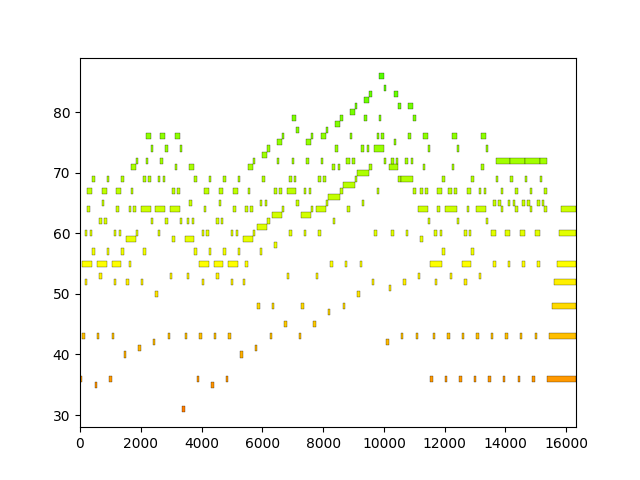

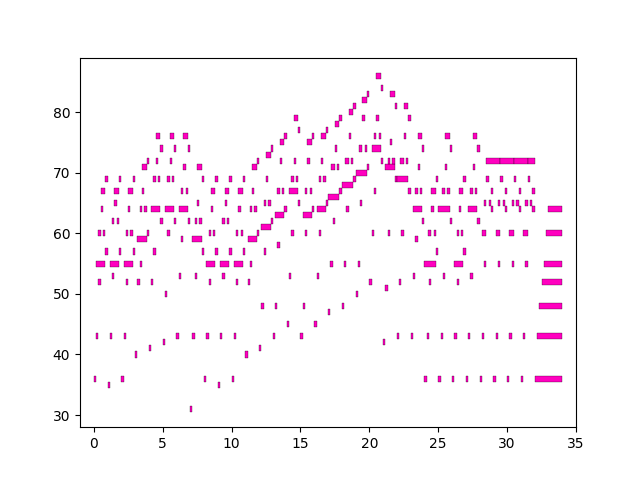

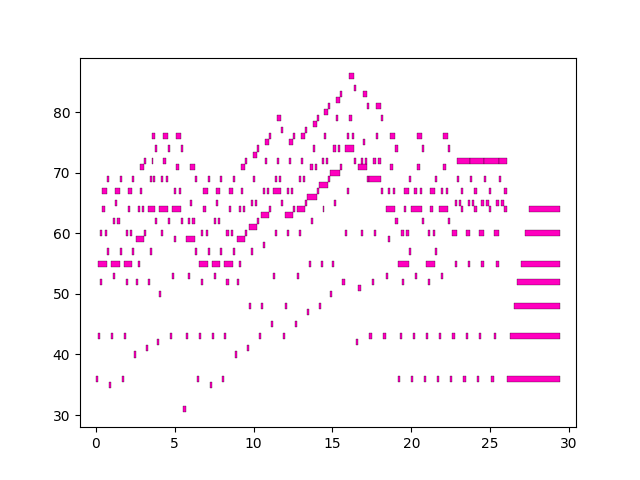

In [18]:
# track_frame_index = 0
# print(mf.track_frames[track_frame_index])
# pd_track = mf.track_frames[track_frame_index].dataframe
# print(pd_track)

print(mf.playing_track_frame)
mf.make_playing_track_frame([0,2])

mu.plot_music(mf.playing_track_frame.get_sub_dataframe(0, 100), 
              metric="ticks",
              chroma_plot=False)

mu.plot_music(mf.playing_track_frame.get_sub_dataframe(0, 100), 
              metric="bartime",
              chroma_plot=False)

mu.plot_music(mf.playing_track_frame.get_sub_dataframe(0, 100), 
              metric="time",
              chroma_plot=False)

In [ ]:
mf.playing_track_frame.suggest_scale(
    start=60,
    end=64,
    weighted=False,
    normalize_scores=True,
    threshold=0.9,
    general_scale_subset=scales.create_general_scale_subset(note_counts=[7]))